## Marthi et al. 2020: FRB20180916B (FRB180916.J0158+65)

In [1]:
import os, glob, itertools
import numpy as np
import matplotlib.pyplot as plt
import pypulse, your
import driftrate, driftlaw
import frbrepeaters

B:\dev\frbrepeaters\driftrate.py:169: ComplexWarning: Casting complex values to real discards the imaginary part
  temp_array_a[0:nx,:] = result_shifted[nx-1:2*nx-1,:]
B:\dev\frbrepeaters\driftrate.py:170: ComplexWarning: Casting complex values to real discards the imaginary part
  temp_array_a[nx:2*nx-1,:] = result_shifted[0:nx-1,:]


type: <class 'numpy.ndarray'>	shape: (128, 200), type: <class 'numpy.ndarray'>	shape: (255, 399)
type: <class 'numpy.ndarray'>	shape: (128, 200), type: <class 'numpy.ndarray'>	shape: (255, 399)
type: <class 'numpy.ndarray'>	shape: (128, 200), type: <class 'numpy.ndarray'>	shape: (255, 399)


<ipython-input-1-4d1ff1ba89a9>:53: UserWarning: No contour levels were found within the data range.
  plt.contour(fitmap, [popt[0]/4, popt[0]*0.9], colors='b', alpha=0.75, extent=corrextents, origin='lower')


type: <class 'numpy.ndarray'>	shape: (128, 200), type: <class 'numpy.ndarray'>	shape: (255, 399)
type: <class 'numpy.ndarray'>	shape: (128, 200), type: <class 'numpy.ndarray'>	shape: (255, 399)
type: <class 'numpy.ndarray'>	shape: (128, 200), type: <class 'numpy.ndarray'>	shape: (255, 399)
type: <class 'numpy.ndarray'>	shape: (128, 200), type: <class 'numpy.ndarray'>	shape: (255, 399)
type: <class 'numpy.ndarray'>	shape: (128, 200), type: <class 'numpy.ndarray'>	shape: (255, 399)
type: <class 'numpy.ndarray'>	shape: (128, 200), type: <class 'numpy.ndarray'>	shape: (255, 399)
type: <class 'numpy.ndarray'>	shape: (128, 200), type: <class 'numpy.ndarray'>	shape: (255, 399)


B:\dev\frbrepeaters\driftrate.py:48: RuntimeWarning: invalid value encountered in sqrt
  width_x = np.sqrt(abs((np.arange(col.size)-y)**2*col).sum()/col.sum())
C:\Users\hmsmo\AppData\Roaming\Python\Python38\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
C:\Users\hmsmo\AppData\Roaming\Python\Python38\site-packages\matplotlib\contour.py:1494: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
C:\Users\hmsmo\AppData\Roaming\Python\Python38\site-packages\matplotlib\contour.py:1495: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())


type: <class 'numpy.ndarray'>	shape: (128, 200), type: <class 'numpy.ndarray'>	shape: (255, 399)
type: <class 'numpy.ndarray'>	shape: (128, 200), type: <class 'numpy.ndarray'>	shape: (255, 399)


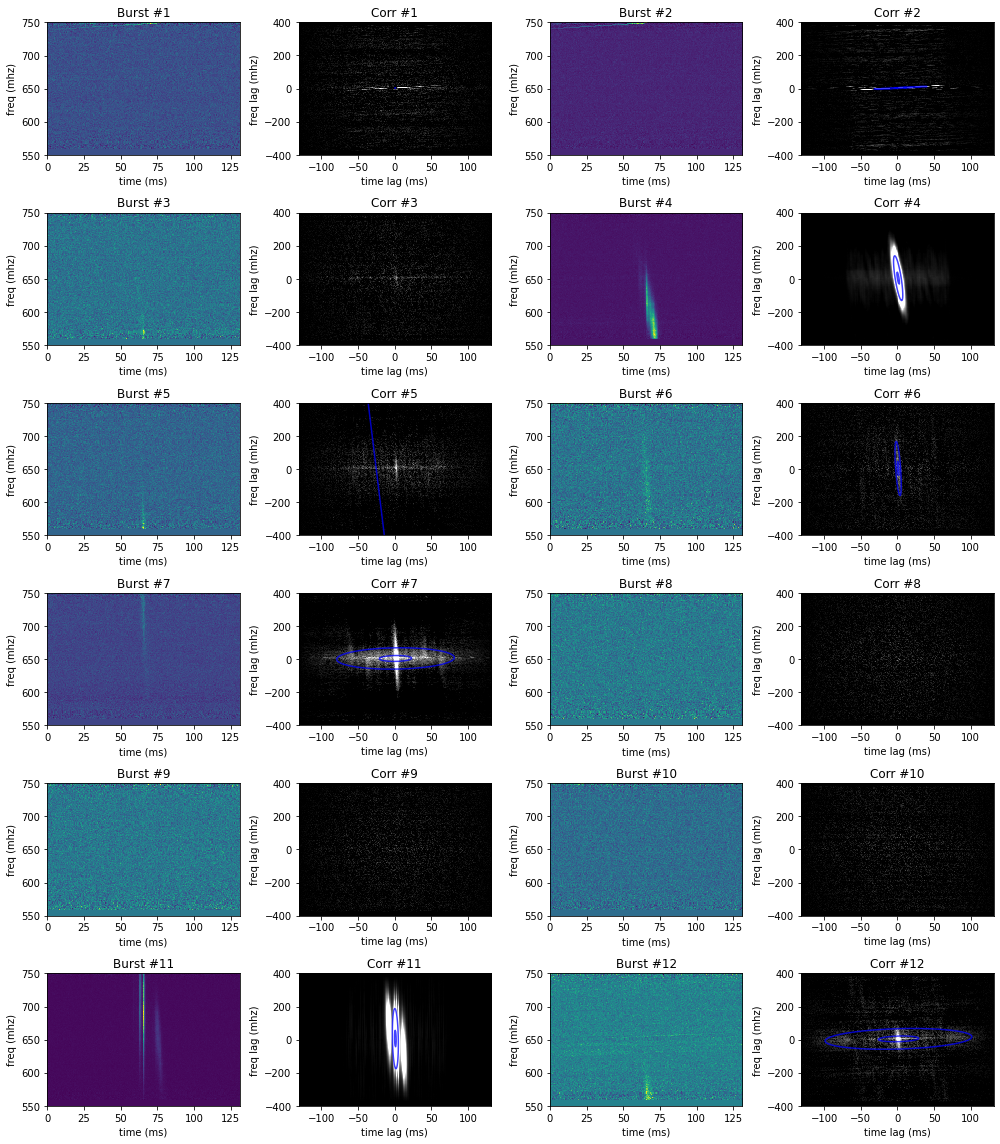

In [1]:
import os, glob, itertools
import numpy as np
import matplotlib.pyplot as plt
import pypulse, your
import driftrate, driftlaw
import frbrepeaters

# %matplotlib qt
%matplotlib inline

DM = 348.82       # pc/cm3
bwidth = 200   # mhz
df = bwidth / 2048   # mhz
dt = 327.68          # us
dt = 0.32768          # ms
lowest_freq = 550 # mhz

plt.figure(figsize=(14,16))
nrows, ncols = 6, 4
ploti = itertools.count(start=1, step=1)
burstnum = 1

for filename in glob.glob('data/marthi2020/DDTC123_24Mar2020/*.npy'):
    # print(f'loading {filename}')
    wfall = np.transpose(np.load(filename))
    wfall[:100] = 0
    wfall[2036:] = 0
    
    nfreq = 128
    tfac = 2
    wfall = driftrate.subsample(wfall, nfreq, wfall.shape[1]//tfac)
    wfall = driftrate.subtractbg(wfall, tleft=0, tright=100)
    ts = np.nanmean(wfall, axis=0)
    pkidx = np.nanargmax(ts)
   
    view = wfall[..., pkidx-100:pkidx+100]
    corr = driftrate.autocorr2d(view)
    print(f'type: {type(view)}\tshape: {view.shape}, type: {type(corr)}\tshape: {corr.shape}')
    drift, drift_error, popt, perr, theta, red_chisq, center_f, fitmap = driftrate.processBurst(view, bwidth/nfreq, dt*tfac, lowest_freq, verbose=False)
    extents, corrextents = driftrate.getExtents(view, df=bwidth/nfreq, dt=dt*tfac, lowest_freq=lowest_freq)

    plt.subplot(nrows, ncols, next(ploti))
    plt.imshow(view, origin='lower', interpolation='none', aspect='auto', extent=extents)
    plt.title(f'Burst #{burstnum}')
    plt.xlabel('time (ms)'), plt.ylabel('freq (mhz)')
    
    plt.subplot(nrows, ncols, next(ploti))
    plt.imshow(corr, origin='lower', interpolation='none', aspect='auto', extent=corrextents, cmap='gray')
    plt.clim(0, np.max(corr)/20)
    plt.title(f'Corr #{burstnum}')
    plt.xlabel('time lag (ms)'), plt.ylabel('freq lag (mhz)')
    if popt[0] > 0:
        plt.contour(fitmap, [popt[0]/4, popt[0]*0.9], colors='b', alpha=0.75, extent=corrextents, origin='lower')

    burstnum += 1

plt.tight_layout()
# plt.savefig('MarthiBursts.pdf')
plt.show()


# Luo et al. 2020: FRB180301

(128, 1792)
shape: (128, 298), 	shape: (255, 595)
(128, 1792)
shape: (128, 296), 	shape: (255, 591)
(128, 1792)
shape: (128, 191), 	shape: (255, 381)
(128, 1792)
shape: (128, 292), 	shape: (255, 583)
(128, 1792)
shape: (128, 290), 	shape: (255, 579)
(128, 1792)
shape: (128, 288), 	shape: (255, 575)
(128, 1792)
shape: (128, 286), 	shape: (255, 571)
(128, 1792)
shape: (128, 284), 	shape: (255, 567)
(128, 1792)
shape: (128, 282), 	shape: (255, 563)
(128, 1792)
shape: (128, 280), 	shape: (255, 559)
(128, 1792)
shape: (128, 278), 	shape: (255, 555)
(128, 1792)
shape: (128, 276), 	shape: (255, 551)
(128, 1792)
shape: (128, 274), 	shape: (255, 547)
(128, 1792)
shape: (128, 272), 	shape: (255, 543)
(128, 1792)
shape: (128, 236), 	shape: (255, 471)


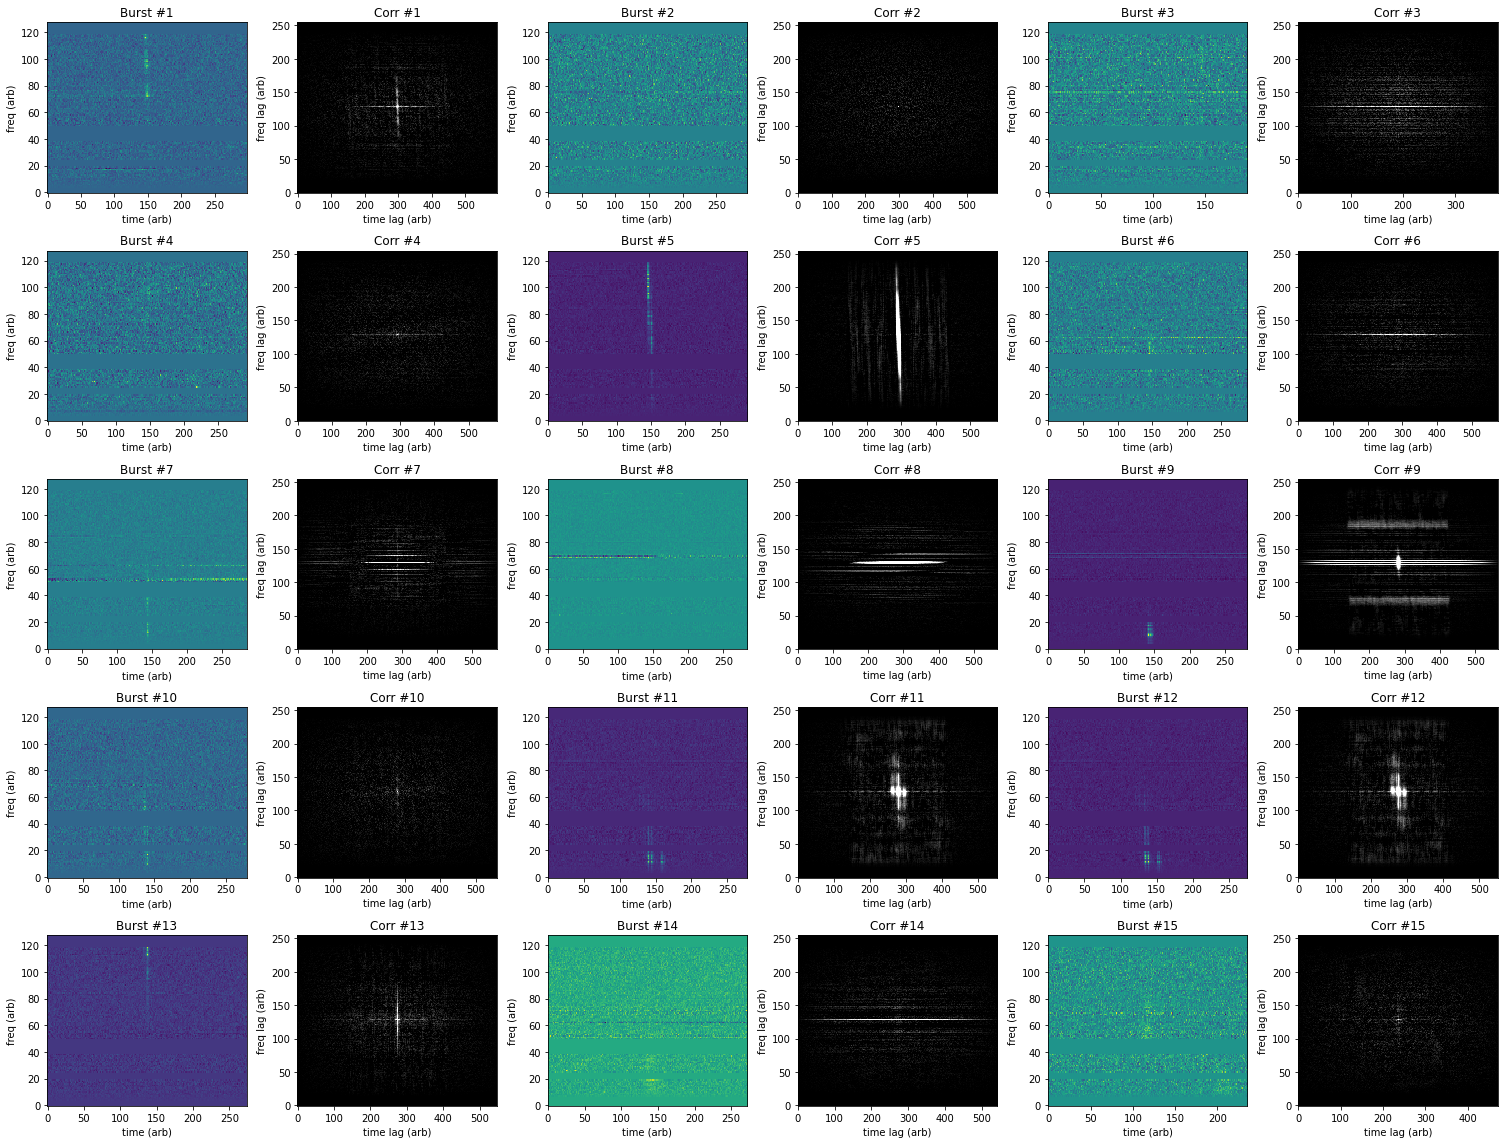

In [3]:
def loadluodata_raw(filename):
    ar = pypulse.Archive(filename, prepare=True)
    wfall = ar.getData()
    subfall = driftrate.subsample(wfall, 128, wfall.shape[1]//4)
    pkidx = np.nanargmax(np.nanmean(subfall, axis=0))
    np.save(filename.split('.')[0] + '_sub.npy', subfall)
    return subfall, pkidx, wfall

def loadluodata(filename):
    subfall = np.load(filename)
    
    subfall = driftrate.subsample(subfall, 128, 7168//4)
    subfall[0:4]     = 0
    subfall[39:50]   = 0
    subfall[20:25]   = 0
    subfall[119:128] = 0
    
    # subfall = driftrate.subtractbg(subfall, tleft=0, tright=10)
    pkidx = np.nanargmax(np.nanmean(subfall, axis=0))
    return subfall, pkidx, subfall

# driftrate.plotStampcard(loadluodata_raw, fileglob='data/luo2020/180813_ar_file/ar_file/converted/*.rf', figsize=(21, 16), nrows=5, ncols=6)
driftrate.plotStampcard(loadluodata, fileglob='data/luo2020/180813_ar_file/ar_file/converted/*.npy', figsize=(21, 16), nrows=5, ncols=6)



(4096, 28672) (128, 2048)


B:\dev\frbrepeaters\driftrate.py:169: ComplexWarning: Casting complex values to real discards the imaginary part
  temp_array_a[0:nx,:] = result_shifted[nx-1:2*nx-1,:]
B:\dev\frbrepeaters\driftrate.py:170: ComplexWarning: Casting complex values to real discards the imaginary part
  temp_array_a[nx:2*nx-1,:] = result_shifted[0:nx-1,:]


1998 6990


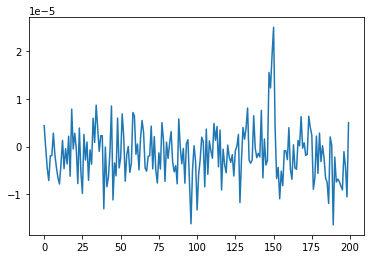

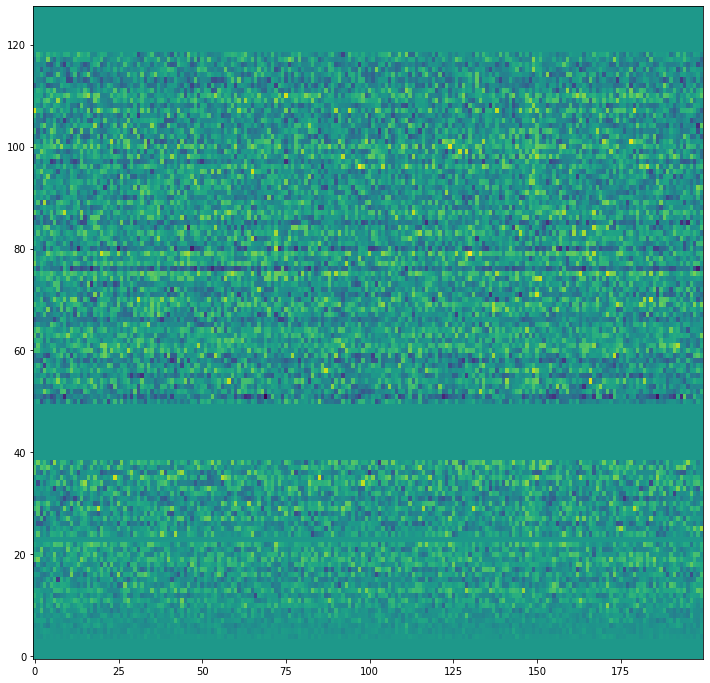

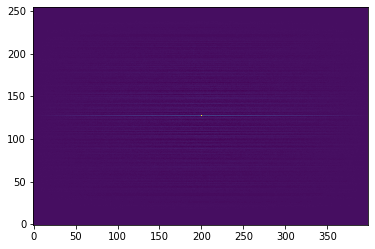

In [33]:
# Single burst
# subfall, pkidx, wfall = loadluodata_raw('data/luo2020/180813_ar_file/ar_file/converted/FRB180301_20190716-M07_0260.rf')
%matplotlib inline
subfall = driftrate.subsample(wfall, 128, wfall.shape[1]//14)
subfall[0:4]     = 0
subfall[39:50]   = 0
subfall[23:24]   = 0
subfall[119:128] = 0
subfall = driftrate.subtractbg(subfall, tleft=0, tright=5)
ts = np.nanmean(subfall, axis=0)
pkidx = np.nanargmax(ts)
print(wfall.shape, subfall.shape)
view = subfall[..., pkidx-150:pkidx+150]
# view = wfall # don't do this, its too much data
corr = driftrate.autocorr2d(view)


print(pkidx, 6990)
plt.plot(ts[pkidx-150:pkidx+150])

plt.figure(figsize=(12,12))
plt.imshow(view, origin='lower', aspect='auto', interpolation='none')
plt.show()
plt.imshow(corr, origin='lower', aspect='auto', interpolation='none')
plt.show()

## Oostrum et al. 2020: FRB20121102A and FRB180814.J0422+73

<ipython-input-2-2d84867b63f3>:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(15,4))


Loading: data/oostrum2020/R1_frb121102\R1_B30.rf
Load time: 4.20 s


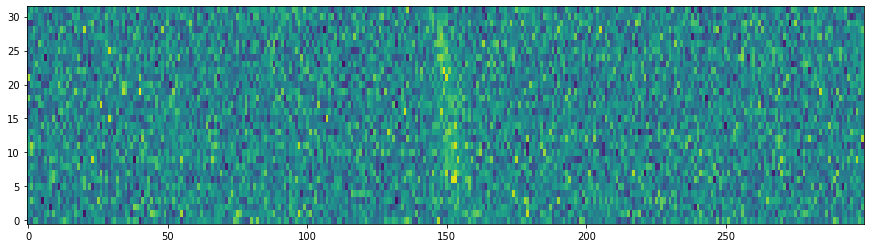

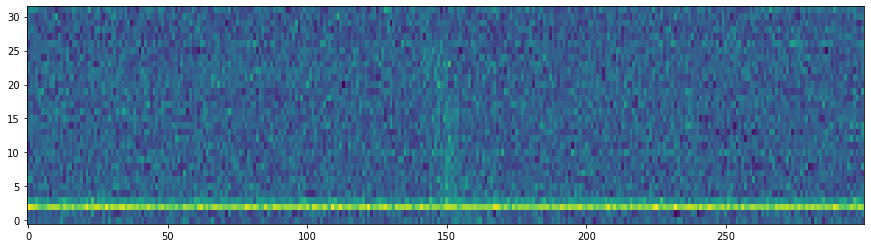

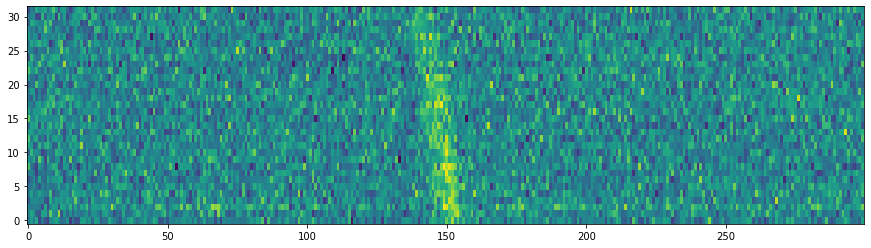

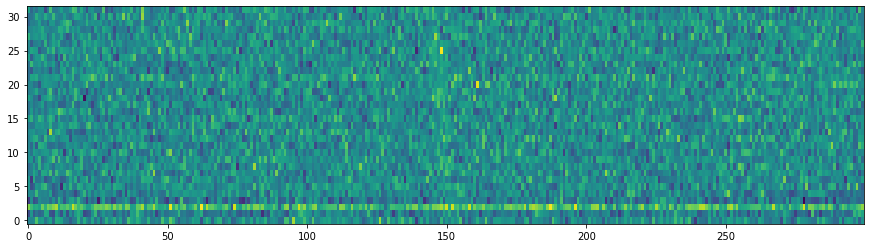

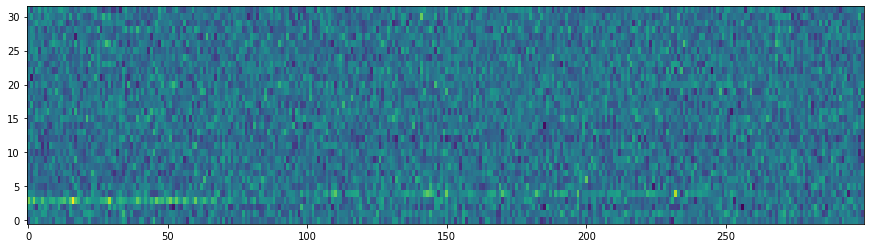

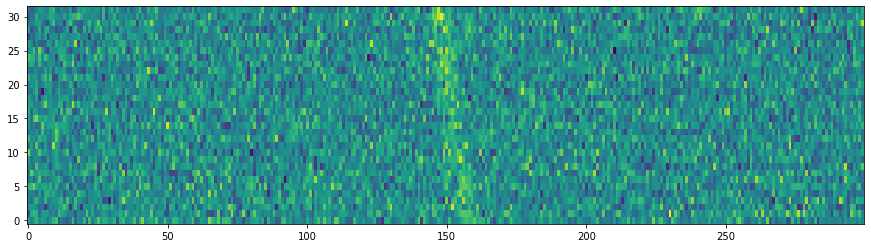

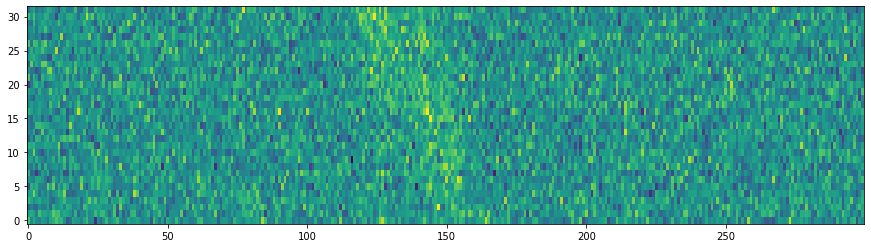

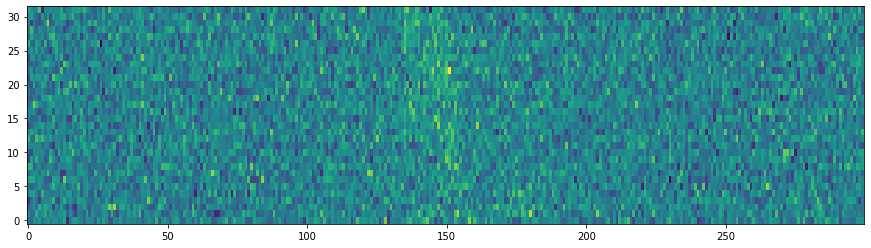

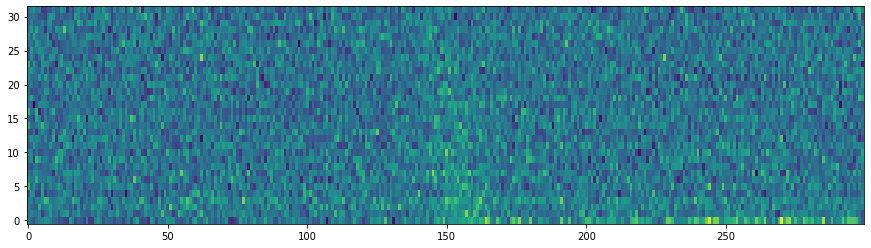

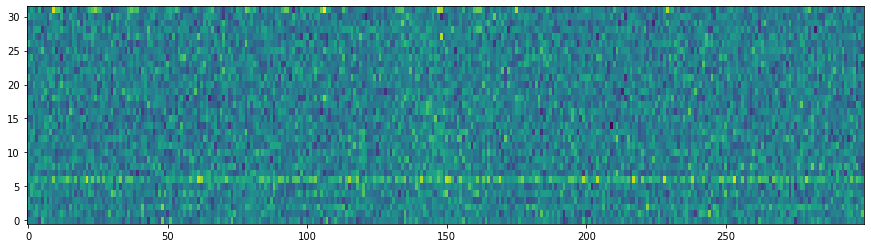

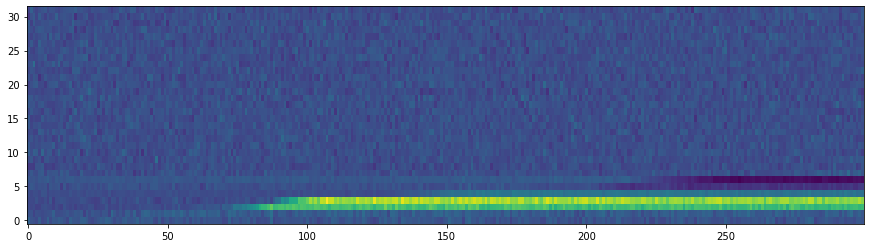

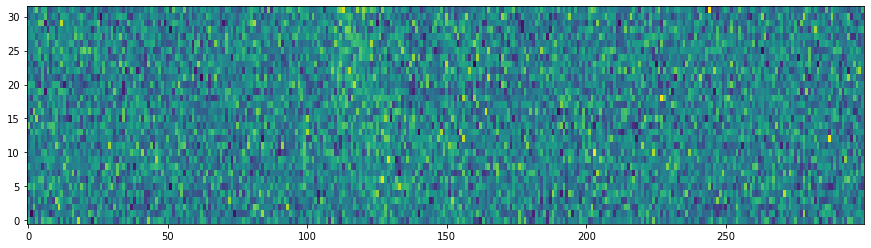

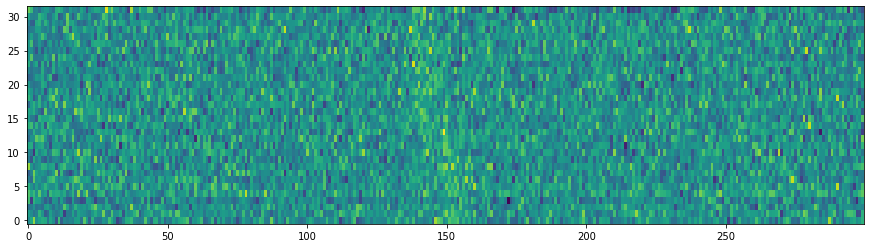

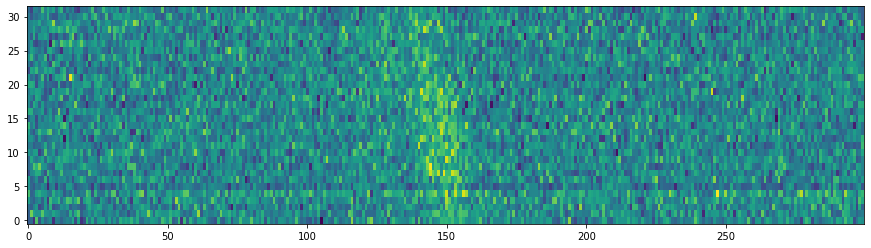

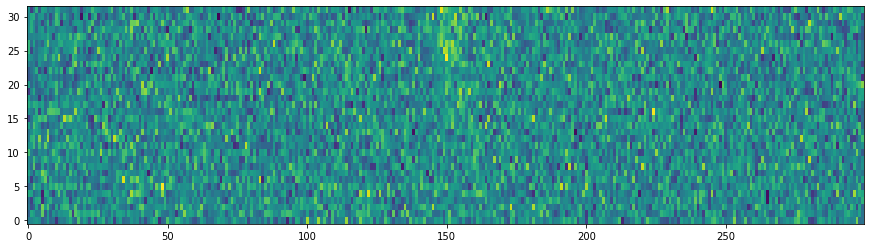

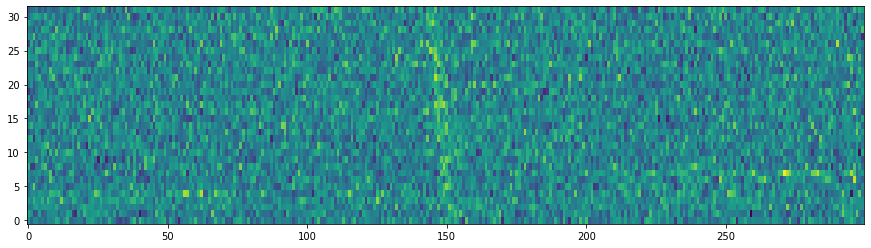

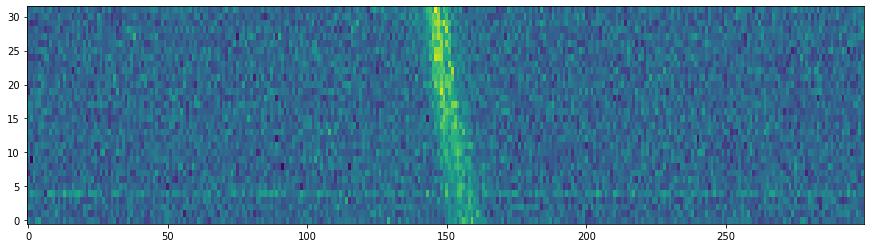

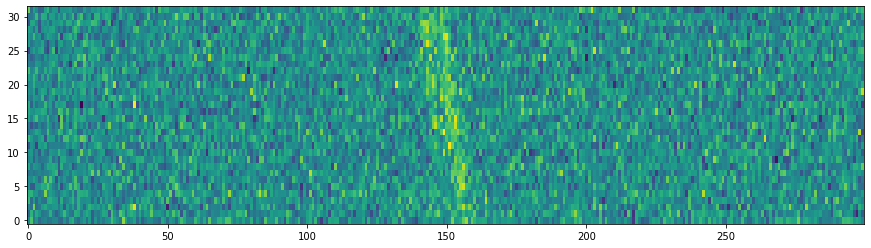

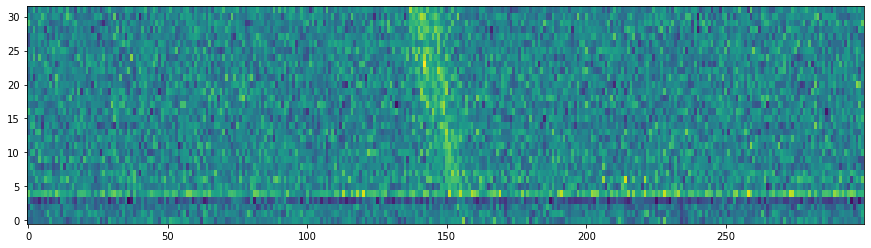

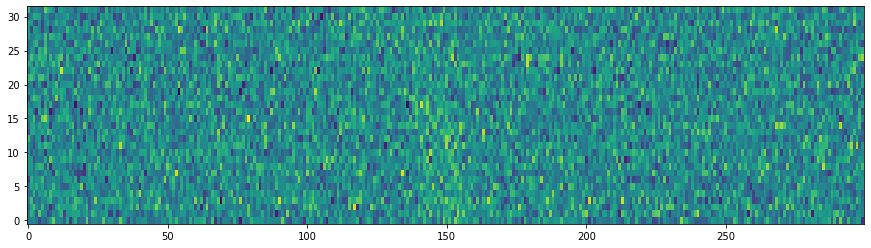

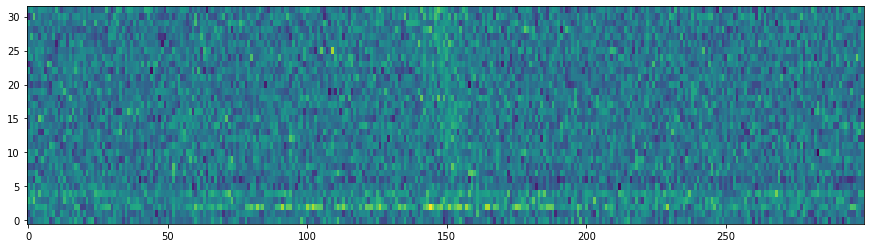

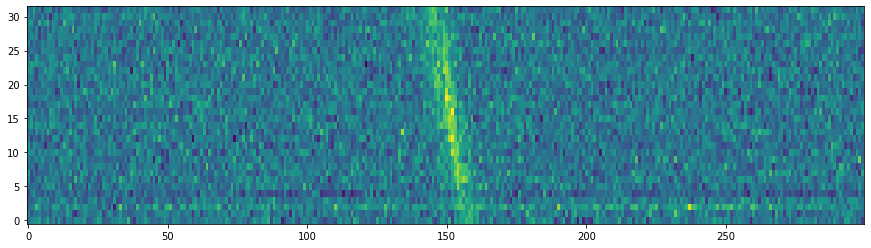

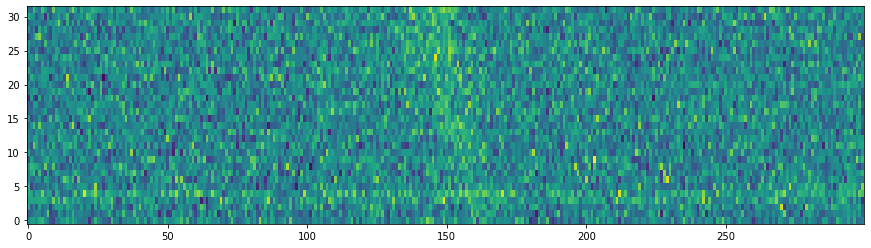

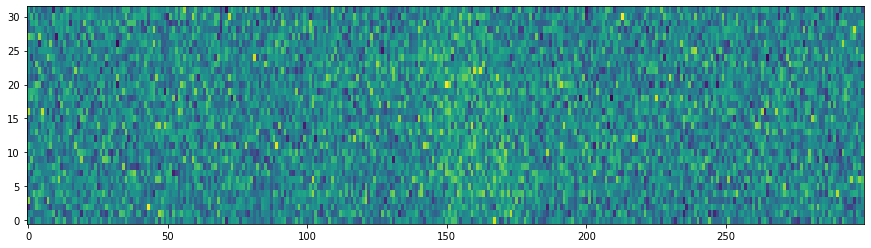

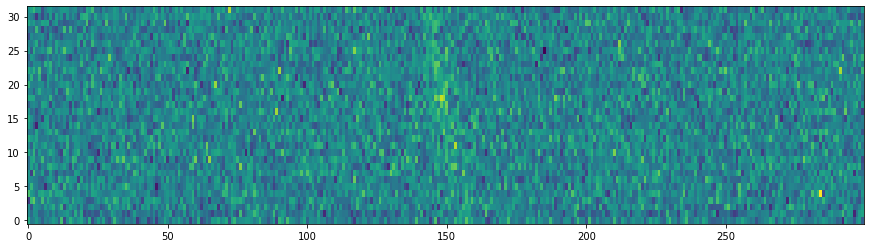

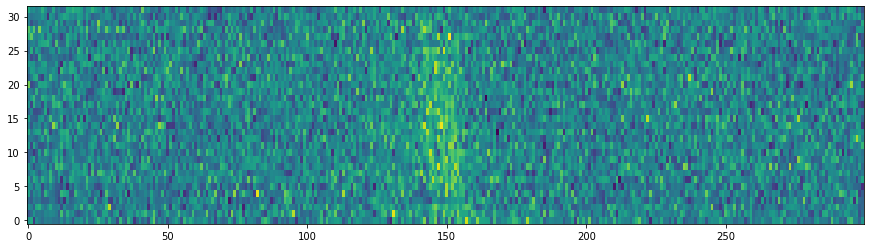

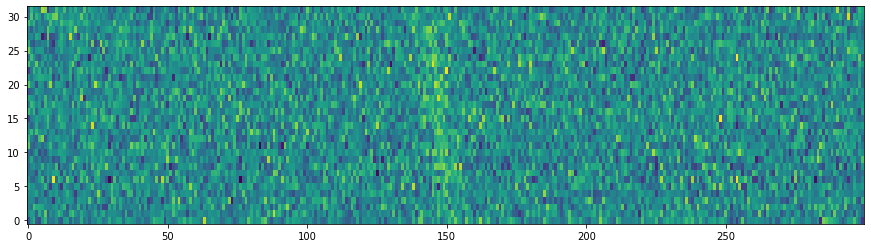

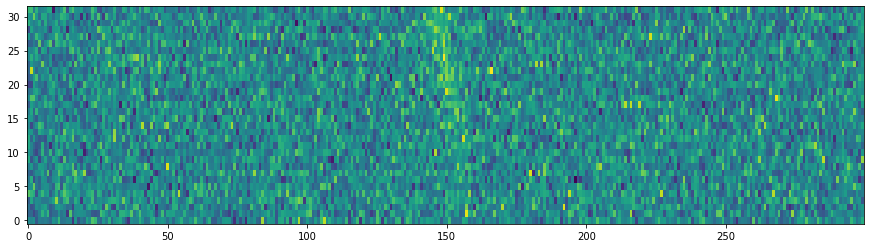

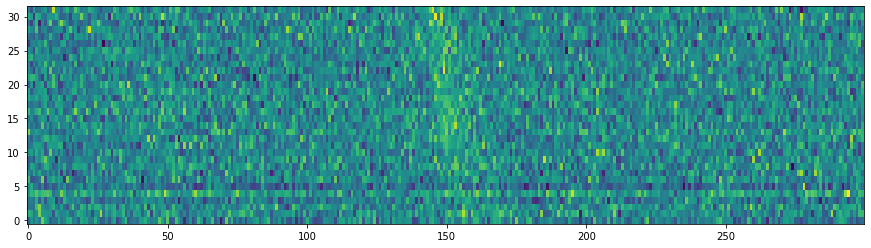

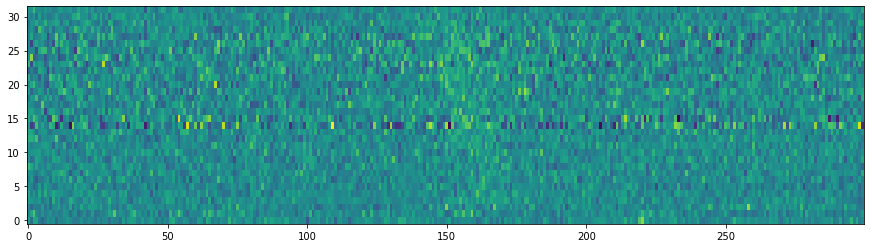

In [2]:
#filename = 'data/oostrum2020/R1_frb121102/R1_B01.rf'
for filename in glob.glob('data/oostrum2020/R1_frb121102/*.rf'):
    #filename = 'data/oostrum2020/R1_frb121102/R1_B01.rf'

    subfall, pkidx = frbrepeaters.loadpsrfits(filename)
    width = 150
    plt.figure(figsize=(15,4))
    plt.imshow(subfall[:, pkidx-width:pkidx+width], origin='lower', interpolation='none', aspect='auto')